# Create Intermediate Raster Result

In [12]:
from datetime import datetime

import geoengine as ge
from geoengine import StoredDataset
from geoengine.colorizer import Colorizer

## Initialize Geo Engine

In [13]:
ge.initialize("http://localhost:3030")

In [14]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          c6047183-074b-4ec6-b488-1688823f0b06
Session valid until: 2022-11-18T15:14:17.483Z

## Define workflow of MODIS NDVI raster

In [15]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

## Query raster via WMS

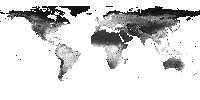

In [16]:

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

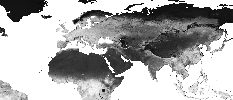

In [17]:
workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
        Colorizer(map_name="gray", min_max=(0, 255))
)

## Store part of the world as new dataset

In [18]:
task_id = workflow.save_as_dataset(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    "Part NDVI",
    "Test Description",
)
task_status = ge.tasks.wait_for_task_to_finish_and_print_status(task_id, 1)

status=running, pct_complete=0.00%, time_estimate=? (± ?), info=None
status=completed, info={'dataset': 'b332c537-7646-44fd-8149-c8e26058844d', 'upload': '4f223ac6-681b-48ea-a0f8-431612410c94'}, time_total=00:00:00


In [19]:
stored_dataset = StoredDataset.from_response(task_status.info)
stored_dataset

StoredDataset(dataset_id=b332c537-7646-44fd-8149-c8e26058844d, upload_id=4f223ac6-681b-48ea-a0f8-431612410c94)

In [20]:
new_workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": str(stored_dataset.dataset_id)
                        }
                    }
                }
            })
new_workflow

26e4fae2-bb3c-50c2-a5b0-11681e02e10c

## WMS request from new dataset

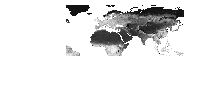

In [21]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

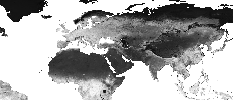

In [22]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

In [ ]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

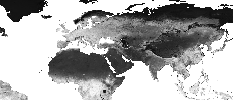

In [11]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)